In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
df=pd.read_csv('amazonfinal.csv')

In [8]:
df.set_index('date', inplace=True)
df=df[1095:]

In [14]:
test = df
# Target column
target_adj_close = pd.DataFrame(test['Close'])
# display(test.head())


# In[31]:

# feature_columns = ['company_news','world_news','company_trends','Pandemic','Quarantine','presidential election','Lockdown']
feature_columns = ['company_trends','Pandemic','Quarantine','Lockdown','presidential election']


# In[32]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
# feature_minmax_transform


In [15]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-20:-1]
target_adj_close = target_adj_close[:-20]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-20:-1]
feature_minmax_transform = feature_minmax_transform[:-20]
# display(validation_X.tail())
# display(validation_y.tail())

# print("\n -----After process------ \n")
# print('Shape of features : ', feature_minmax_transform.shape)
# print('Shape of target : ', target_adj_close.shape)
# display(target_adj_close.tail())

In [16]:
ts_split= TimeSeriesSplit(n_splits=4)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [17]:
X_train.shape


(80, 5)

In [18]:
X_test.shape

(20, 5)

In [19]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [20]:

X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [26]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, X_train.shape[1]), activation='tanh',dropout=0.20))

model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='SGD')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=1000,batch_size=5)


Epoch 1/1000
80/80 [==============================] - 1s 16ms/step - loss: 1937.7579
Epoch 2/1000
80/80 [==============================] - 0s 839us/step - loss: 1937.5738
Epoch 3/1000
80/80 [==============================] - 0s 881us/step - loss: 1937.3896
Epoch 4/1000
80/80 [==============================] - 0s 815us/step - loss: 1937.2038
Epoch 5/1000
80/80 [==============================] - 0s 795us/step - loss: 1937.0187
Epoch 6/1000
80/80 [==============================] - 0s 793us/step - loss: 1936.8327
Epoch 7/1000
80/80 [==============================] - 0s 785us/step - loss: 1936.6433
Epoch 8/1000
80/80 [==============================] - 0s 795us/step - loss: 1936.4553
Epoch 9/1000
80/80 [==============================] - 0s 804us/step - loss: 1936.2639
Epoch 10/1000
80/80 [==============================] - 0s 798us/step - loss: 1936.0691
Epoch 11/1000
80/80 [==============================] - 0s 818us/step - loss: 1935.8739
Epoch 12/1000
80/80 [==============================] 

80/80 [==============================] - 0s 827us/step - loss: 1815.9536
Epoch 96/1000
80/80 [==============================] - 0s 819us/step - loss: 1809.8194
Epoch 97/1000
80/80 [==============================] - 0s 810us/step - loss: 1804.9282
Epoch 98/1000
80/80 [==============================] - 0s 821us/step - loss: 1799.3587
Epoch 99/1000
80/80 [==============================] - 0s 822us/step - loss: 1793.1216
Epoch 100/1000
80/80 [==============================] - 0s 822us/step - loss: 1788.2983
Epoch 101/1000
80/80 [==============================] - 0s 849us/step - loss: 1781.4783
Epoch 102/1000
80/80 [==============================] - 0s 853us/step - loss: 1776.0976
Epoch 103/1000
80/80 [==============================] - 0s 872us/step - loss: 1770.2694
Epoch 104/1000
80/80 [==============================] - 0s 880us/step - loss: 1763.8268
Epoch 105/1000
80/80 [==============================] - 0s 879us/step - loss: 1757.5618
Epoch 106/1000
80/80 [=============================

80/80 [==============================] - 0s 923us/step - loss: 1039.4380
Epoch 189/1000
80/80 [==============================] - 0s 924us/step - loss: 1030.5593
Epoch 190/1000
80/80 [==============================] - 0s 908us/step - loss: 1020.6614
Epoch 191/1000
80/80 [==============================] - 0s 921us/step - loss: 1012.9659
Epoch 192/1000
80/80 [==============================] - 0s 893us/step - loss: 1003.0475
Epoch 193/1000
80/80 [==============================] - 0s 899us/step - loss: 994.1639
Epoch 194/1000
80/80 [==============================] - 0s 893us/step - loss: 982.6490
Epoch 195/1000
80/80 [==============================] - 0s 911us/step - loss: 974.8645
Epoch 196/1000
80/80 [==============================] - 0s 923us/step - loss: 965.6590
Epoch 197/1000
80/80 [==============================] - 0s 920us/step - loss: 955.6998
Epoch 198/1000
80/80 [==============================] - 0s 906us/step - loss: 946.8192
Epoch 199/1000
80/80 [==============================]

80/80 [==============================] - 0s 981us/step - loss: 174.8620
Epoch 283/1000
80/80 [==============================] - 0s 977us/step - loss: 167.1308
Epoch 284/1000
80/80 [==============================] - 0s 948us/step - loss: 160.5722
Epoch 285/1000
80/80 [==============================] - 0s 920us/step - loss: 152.3771
Epoch 286/1000
80/80 [==============================] - 0s 914us/step - loss: 146.0873
Epoch 287/1000
80/80 [==============================] - 0s 914us/step - loss: 138.7440
Epoch 288/1000
80/80 [==============================] - 0s 909us/step - loss: 132.4562
Epoch 289/1000
80/80 [==============================] - 0s 914us/step - loss: 125.8861
Epoch 290/1000
80/80 [==============================] - 0s 918us/step - loss: 121.0802
Epoch 291/1000
80/80 [==============================] - 0s 918us/step - loss: 115.0515
Epoch 292/1000
80/80 [==============================] - 0s 955us/step - loss: 110.9057
Epoch 293/1000
80/80 [==============================] - 0s

80/80 [==============================] - 0s 896us/step - loss: 91.3908
Epoch 378/1000
80/80 [==============================] - 0s 885us/step - loss: 90.4377
Epoch 379/1000
80/80 [==============================] - 0s 874us/step - loss: 91.0572
Epoch 380/1000
80/80 [==============================] - 0s 884us/step - loss: 91.1838
Epoch 381/1000
80/80 [==============================] - 0s 884us/step - loss: 90.3085
Epoch 382/1000
80/80 [==============================] - 0s 881us/step - loss: 90.0564
Epoch 383/1000
80/80 [==============================] - 0s 874us/step - loss: 90.8675
Epoch 384/1000
80/80 [==============================] - 0s 887us/step - loss: 90.2704
Epoch 385/1000
80/80 [==============================] - 0s 885us/step - loss: 90.8158
Epoch 386/1000
80/80 [==============================] - 0s 884us/step - loss: 90.9499
Epoch 387/1000
80/80 [==============================] - 0s 876us/step - loss: 91.0911
Epoch 388/1000
80/80 [==============================] - 0s 885us/step

80/80 [==============================] - 0s 971us/step - loss: 90.9229
Epoch 473/1000
80/80 [==============================] - 0s 960us/step - loss: 90.0906
Epoch 474/1000
80/80 [==============================] - 0s 974us/step - loss: 89.8028
Epoch 475/1000
80/80 [==============================] - 0s 926us/step - loss: 90.4024
Epoch 476/1000
80/80 [==============================] - 0s 954us/step - loss: 90.9612
Epoch 477/1000
80/80 [==============================] - 0s 976us/step - loss: 89.6310
Epoch 478/1000
80/80 [==============================] - 0s 1ms/step - loss: 91.9754
Epoch 479/1000
80/80 [==============================] - 0s 947us/step - loss: 91.1047
Epoch 480/1000
80/80 [==============================] - 0s 932us/step - loss: 90.2733
Epoch 481/1000
80/80 [==============================] - 0s 982us/step - loss: 91.2306
Epoch 482/1000
80/80 [==============================] - 0s 927us/step - loss: 90.8231
Epoch 483/1000
80/80 [==============================] - 0s 920us/step -

80/80 [==============================] - 0s 978us/step - loss: 90.6823
Epoch 568/1000
80/80 [==============================] - 0s 976us/step - loss: 91.2800
Epoch 569/1000
80/80 [==============================] - 0s 986us/step - loss: 90.8241
Epoch 570/1000
80/80 [==============================] - 0s 968us/step - loss: 90.4763
Epoch 571/1000
80/80 [==============================] - 0s 955us/step - loss: 91.1091
Epoch 572/1000
80/80 [==============================] - 0s 993us/step - loss: 90.7504
Epoch 573/1000
80/80 [==============================] - 0s 957us/step - loss: 91.0784
Epoch 574/1000
80/80 [==============================] - 0s 983us/step - loss: 91.1451
Epoch 575/1000
80/80 [==============================] - 0s 997us/step - loss: 91.0170
Epoch 576/1000
80/80 [==============================] - 0s 970us/step - loss: 90.2941
Epoch 577/1000
80/80 [==============================] - 0s 968us/step - loss: 88.7918
Epoch 578/1000
80/80 [==============================] - 0s 979us/step

80/80 [==============================] - 0s 925us/step - loss: 90.6550
Epoch 663/1000
80/80 [==============================] - 0s 922us/step - loss: 90.6520
Epoch 664/1000
80/80 [==============================] - 0s 904us/step - loss: 91.0822
Epoch 665/1000
80/80 [==============================] - 0s 913us/step - loss: 90.4810
Epoch 666/1000
80/80 [==============================] - 0s 912us/step - loss: 91.4072
Epoch 667/1000
80/80 [==============================] - 0s 914us/step - loss: 90.1429
Epoch 668/1000
80/80 [==============================] - 0s 917us/step - loss: 90.4746
Epoch 669/1000
80/80 [==============================] - 0s 911us/step - loss: 89.8638
Epoch 670/1000
80/80 [==============================] - 0s 914us/step - loss: 90.1457
Epoch 671/1000
80/80 [==============================] - 0s 922us/step - loss: 89.8638
Epoch 672/1000
80/80 [==============================] - 0s 912us/step - loss: 90.4208
Epoch 673/1000
80/80 [==============================] - 0s 909us/step

80/80 [==============================] - 0s 913us/step - loss: 89.5106
Epoch 758/1000
80/80 [==============================] - 0s 919us/step - loss: 90.3489
Epoch 759/1000
80/80 [==============================] - 0s 905us/step - loss: 89.4343
Epoch 760/1000
80/80 [==============================] - 0s 905us/step - loss: 90.0114
Epoch 761/1000
80/80 [==============================] - 0s 901us/step - loss: 89.6573
Epoch 762/1000
80/80 [==============================] - 0s 906us/step - loss: 89.8959
Epoch 763/1000
80/80 [==============================] - 0s 921us/step - loss: 91.2576
Epoch 764/1000
80/80 [==============================] - 0s 907us/step - loss: 89.6488
Epoch 765/1000
80/80 [==============================] - 0s 945us/step - loss: 89.8014
Epoch 766/1000
80/80 [==============================] - 0s 936us/step - loss: 89.8101
Epoch 767/1000
80/80 [==============================] - 0s 908us/step - loss: 89.3474
Epoch 768/1000
80/80 [==============================] - 0s 900us/step

80/80 [==============================] - 0s 935us/step - loss: 89.4493
Epoch 853/1000
80/80 [==============================] - 0s 934us/step - loss: 89.5440
Epoch 854/1000
80/80 [==============================] - 0s 928us/step - loss: 89.8936
Epoch 855/1000
80/80 [==============================] - 0s 934us/step - loss: 90.6814
Epoch 856/1000
80/80 [==============================] - 0s 927us/step - loss: 90.3417
Epoch 857/1000
80/80 [==============================] - 0s 922us/step - loss: 89.2661
Epoch 858/1000
80/80 [==============================] - 0s 917us/step - loss: 89.0656
Epoch 859/1000
80/80 [==============================] - 0s 924us/step - loss: 88.6746
Epoch 860/1000
80/80 [==============================] - 0s 912us/step - loss: 89.3738
Epoch 861/1000
80/80 [==============================] - 0s 925us/step - loss: 89.8312
Epoch 862/1000
80/80 [==============================] - 0s 929us/step - loss: 88.8926
Epoch 863/1000
80/80 [==============================] - 0s 924us/step

80/80 [==============================] - 0s 949us/step - loss: 88.9335
Epoch 948/1000
80/80 [==============================] - 0s 953us/step - loss: 89.2458
Epoch 949/1000
80/80 [==============================] - 0s 949us/step - loss: 87.8689
Epoch 950/1000
80/80 [==============================] - 0s 956us/step - loss: 89.3210
Epoch 951/1000
80/80 [==============================] - 0s 977us/step - loss: 88.8850
Epoch 952/1000
80/80 [==============================] - 0s 942us/step - loss: 88.6408
Epoch 953/1000
80/80 [==============================] - 0s 921us/step - loss: 88.8213
Epoch 954/1000
80/80 [==============================] - 0s 906us/step - loss: 88.5904
Epoch 955/1000
80/80 [==============================] - 0s 909us/step - loss: 88.9767
Epoch 956/1000
80/80 [==============================] - 0s 909us/step - loss: 89.3984
Epoch 957/1000
80/80 [==============================] - 0s 905us/step - loss: 87.6497
Epoch 958/1000
80/80 [==============================] - 0s 910us/step

In [27]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	-0.047
The R2 score on the Test set is:	-2.005


In [28]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)


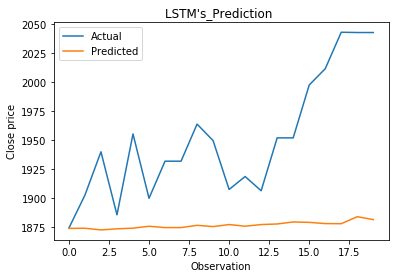

In [29]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test_LSTM, label='Predicted')
plt.title("LSTM's_Prediction ")
plt.xlabel('Observation')
plt.ylabel('Close price')
plt.legend()
plt.show()

In [248]:
a=zip(list(y_test),list(y_pred_test_LSTM))

In [249]:
list(a)

[(426.7950134277344, array([379.8587], dtype=float32)),
 (426.7950134277344, array([381.93054], dtype=float32)),
 (423.6700134277344, array([383.9495], dtype=float32)),
 (427.260009765625, array([382.36618], dtype=float32)),
 (427.80999755859375, array([383.16837], dtype=float32)),
 (439.3900146484375, array([381.9591], dtype=float32)),
 (434.9200134277344, array([380.71332], dtype=float32)),
 (435.6050109863281, array([380.2932], dtype=float32)),
 (435.6050109863281, array([381.9517], dtype=float32)),
 (436.2900085449219, array([382.7471], dtype=float32)),
 (445.989990234375, array([381.53073], dtype=float32)),
 (440.8399963378906, array([382.75824], dtype=float32)),
 (440.1000061035156, array([381.94296], dtype=float32)),
 (438.1000061035156, array([382.74716], dtype=float32)),
 (433.9799957275391, array([381.125], dtype=float32)),
 (433.9799957275391, array([383.9594], dtype=float32)),
 (429.8599853515625, array([385.9117], dtype=float32)),
 (434.0899963378906, array([383.16232], dt